In [2]:
# importing the necessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
# Loading the dataset
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
# shape of the dataframe
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

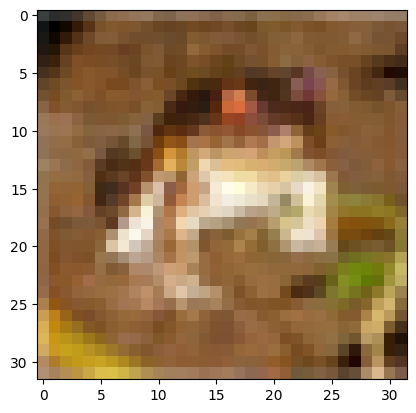

In [5]:
# first image
class_labels = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.imshow(X_train[0])
plt.show()

In [6]:
# Label for the above
[index] = y_train[0]
class_labels[index]

'frog'

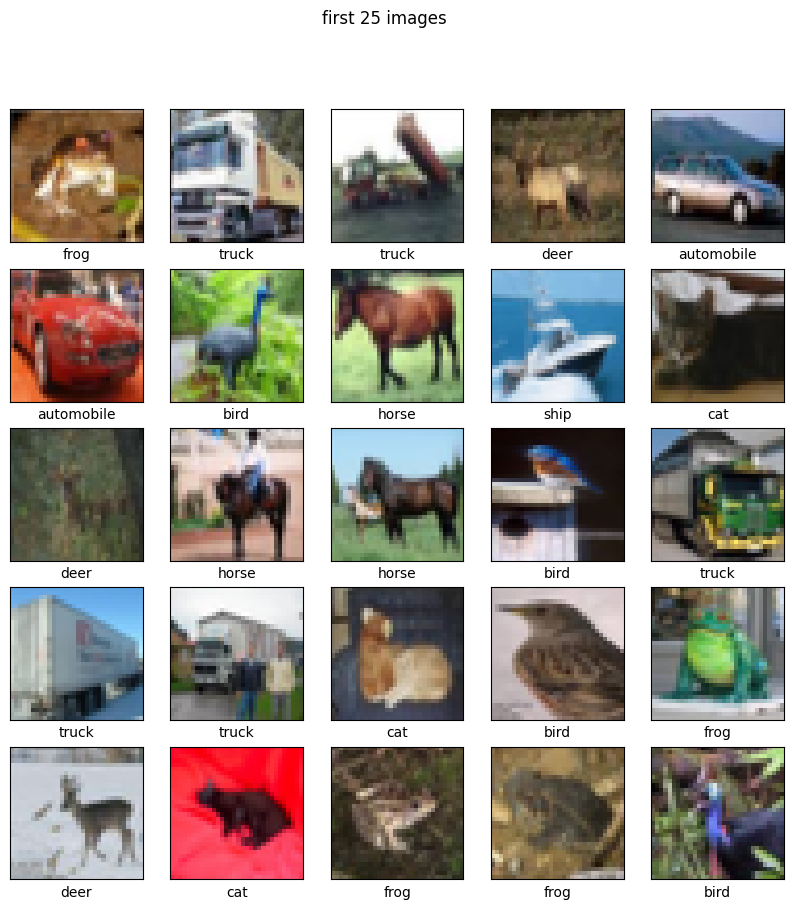

In [7]:
# first 25 images
plt.figure(figsize=(10,10))
plt.suptitle("first 25 images")
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  [index] = y_train[i]
  plt.xlabel(class_labels[index])
plt.show()

In [8]:
# applying transformation
X_train = X_train/255
X_test = X_test/255

In [9]:
# CNN Architechture
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D,Flatten

In [17]:
# Creating a model architechture
model = Sequential()

# convolution layer 1
model.add(Conv2D(128, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(2,2))

# convolution layer 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

# convolution layer 3
model.add(Conv2D(32, (3,3), activation='relu'))


# flattening
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# compiling the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
# traning the model

model_history = model.fit(X_train,y_train, validation_split=0.2, batch_size=100, epochs=20)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.3068 - loss: 1.8786 - val_accuracy: 0.4816 - val_loss: 1.4389
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5030 - loss: 1.3896 - val_accuracy: 0.5453 - val_loss: 1.2946
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5551 - loss: 1.2425 - val_accuracy: 0.5845 - val_loss: 1.1797
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5958 - loss: 1.1429 - val_accuracy: 0.6056 - val_loss: 1.1130
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6278 - loss: 1.0620 - val_accuracy: 0.6158 - val_loss: 1.0858
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6453 - loss: 1.0036 - val_accuracy: 0.6269 - val_loss: 1.0938
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6618 - loss: 0.9643 - val_accuracy: 0.6609 - val_loss: 0.9790
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6872 - loss: 0.8951 - val_accuracy: 0

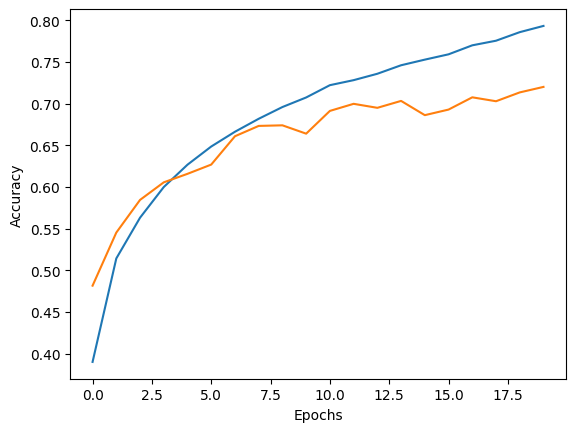

In [20]:
# visualisation
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

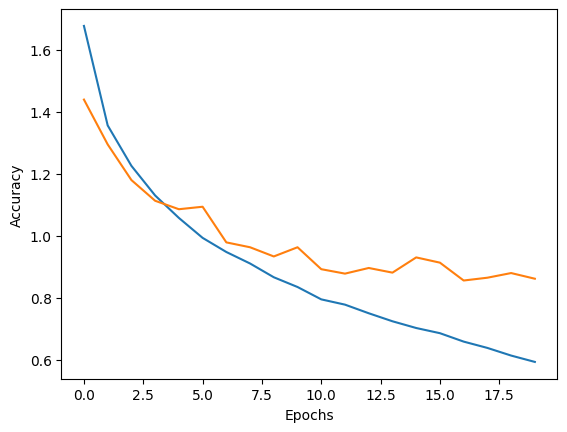

In [21]:
# visualisation
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [32]:
# predictions
predictions = model.predict(X_test)

prediction_label = [np.argmax(prediction) for prediction in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [33]:
# Validation
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(prediction_label, y_test)

0.7126

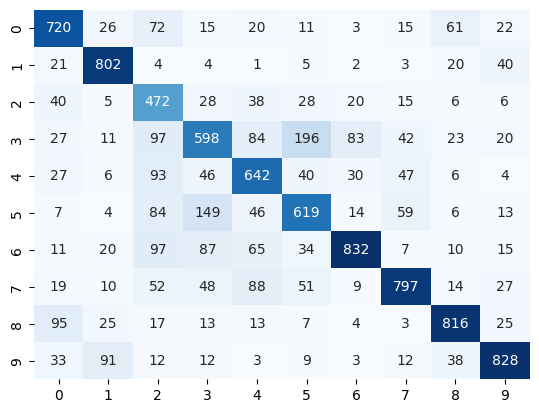

In [38]:
# confusion matrix
cm = confusion_matrix(prediction_label, y_test)

sns.heatmap(cm, annot=True, cbar=False, fmt='0.0f', cmap='Blues')
plt.show()